# Vježba 02: Primjena CRISP-DM metodologije u Pythonu
# Faze: Business Understanding, Data Understanding, Data Preparation

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# FAZA 1: BUSINESS UNDERSTANDING (Razumijevanje Poslovanja)
# CILJ: Razumjeti osnovne karakteristike prodaje u online trgovini.
# POSLOVNA PITANJA:
# Pitanje 1: Tko su naši najbolji kupci?
# Pitanje 2: Koja je prosječna vrijednost narudžbe po državi?
# Pitanje 3: Kakva je distribucija cijena proizvoda (UnitPrice)?

# FAZA 2: DATA UNDERSTANDING (Razumijevanje Podataka)

In [8]:
data = pd.read_csv('C:/Users/abhothoh/Downloads/online_retail.csv')

# Istraživačka analiza podataka (Exploratory Data Analysis - EDA)

In [11]:
print(data.head())

   OrderID            Date  CustomerID         Country       Product  \
0   536365  12/1/2024 8:26     17850.0  United Kingdom  White Hanger   
1   536366  12/1/2024 8:28     17850.0  United Kingdom     Cream Cup   
2   536367  12/1/2024 8:34         NaN          France   Alarm Clock   
3   536368  12/1/2024 8:34     13047.0          France   Toy Soldier   
4   536368  12/1/2024 8:34     13047.0          France   Toy Soldier   

   Quantity  UnitPrice   Category  
0         6       2.55  Household  
1         2       1.85    Kitchen  
2        -1       3.75      Decor  
3         3       2.10       Toys  
4         3       2.10       Toys  


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     9 non-null      int64  
 1   Date        9 non-null      object 
 2   CustomerID  8 non-null      float64
 3   Country     9 non-null      object 
 4   Product     9 non-null      object 
 5   Quantity    9 non-null      int64  
 6   UnitPrice   9 non-null      float64
 7   Category    8 non-null      object 
dtypes: float64(2), int64(2), object(4)
memory usage: 708.0+ bytes


In [15]:
print(data.describe())

             OrderID    CustomerID   Quantity  UnitPrice
count       9.000000      8.000000   9.000000   9.000000
mean   536368.444444  14365.000000   3.111111   2.783333
std         2.297341   2185.625899   3.756476   1.001873
min    536365.000000  12583.000000  -2.000000   1.850000
25%    536367.000000  13047.000000   1.000000   2.100000
50%    536368.000000  13397.500000   3.000000   2.100000
75%    536370.000000  14773.500000   6.000000   3.750000
max    536372.000000  17850.000000  10.000000   4.250000


In [17]:
duplicated_rows = data.duplicated().sum()
print(f"\nBroj dupliciranih redova: {duplicated_rows}")


Broj dupliciranih redova: 1


# FAZA 3: DATA PREPARATION (Priprema Podataka)

In [20]:
# 1. Uklanjanje duplikata
# inplace=True vrši izmjenu direktno na 'data' DataFrame-u
data.drop_duplicates(inplace=True)
print(f"\n1. Duplicirani redovi su uklonjeni. Novi broj redova: {len(data)}")


1. Duplicirani redovi su uklonjeni. Novi broj redova: 8


In [22]:
# 2. Rješavanje logičkih grešaka (npr. negativne količine)
# Zadržavamo samo redove gdje je vrijednost u stupcu 'Quantity' veća od 0 
data = data[data['Quantity'] > 0]
print(f"2. Redovi s negativnom količinom su uklonjeni. Novi broj redova: {len(data)}")

2. Redovi s negativnom količinom su uklonjeni. Novi broj redova: 6


In [24]:
# 3. Rješavanje nedostajućih vrijednosti (Missing Values)
# Za 'CustomerID' i 'Category' nemamo jednostavan način za popunjavanje,
# pa ćemo za ovu analizu obrisati redove gdje te vrijednosti nedostaju.
data.dropna(subset=['CustomerID', 'Category'], inplace=True)
print(f"3. Redovi s nedostajućim CustomerID ili Category su uklonjeni. Novi broj redova: {len(data)}")

3. Redovi s nedostajućim CustomerID ili Category su uklonjeni. Novi broj redova: 6


In [26]:
# 4. Ispravljanje tipa podatka za datum
# Pretvaramo 'object' tip u 'datetime' tip, što omogućuje analizu po vremenu.
data['Date'] = pd.to_datetime(data['Date'])
print("\n4. Tip podatka za stupac 'Date' je ispravljen u datetime.")


4. Tip podatka za stupac 'Date' je ispravljen u datetime.


In [28]:
# --- Inženjering Značajki (Feature Engineering) ---
# Kreiranje novih, korisnih stupaca iz postojećih podataka.
# 1. Kreiranje stupca 'Revenue' (Prihod)
data['Revenue'] = data['Quantity'] * data['UnitPrice']
# 2. Kreiranje stupca 'DayOfWeek' (Dan u tjednu) iz datuma
data['DayOfWeek'] = data['Date'].dt.day_name()

In [30]:
print(data.head())

   OrderID                Date  CustomerID         Country       Product  \
0   536365 2024-12-01 08:26:00     17850.0  United Kingdom  White Hanger   
1   536366 2024-12-01 08:28:00     17850.0  United Kingdom     Cream Cup   
3   536368 2024-12-01 08:34:00     13047.0          France   Toy Soldier   
5   536369 2024-12-01 08:35:00     13047.0         Germany    Wooden Box   
7   536371 2024-12-01 09:00:00     13748.0         Germany     Red Scarf   

   Quantity  UnitPrice   Category  Revenue DayOfWeek  
0         6       2.55  Household     15.3    Sunday  
1         2       1.85    Kitchen      3.7    Sunday  
3         3       2.10       Toys      6.3    Sunday  
5         1       2.10      Decor      2.1    Sunday  
7         6       4.25    Apparel     25.5    Sunday  


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 8
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     6 non-null      int64         
 1   Date        6 non-null      datetime64[ns]
 2   CustomerID  6 non-null      float64       
 3   Country     6 non-null      object        
 4   Product     6 non-null      object        
 5   Quantity    6 non-null      int64         
 6   UnitPrice   6 non-null      float64       
 7   Category    6 non-null      object        
 8   Revenue     6 non-null      float64       
 9   DayOfWeek   6 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 528.0+ bytes


# ANALIZA I VIZUALIZACIJA: Odgovaranje na poslovna pitanja



--- ODGOVOR NA PITANJE 1: Tko su naši najbolji kupci? ---

--- Tablica: Top 5 kupaca po ukupnom prihodu ---
CustomerID
13748.0    68.0
17850.0    19.0
13047.0     8.4
Name: Revenue, dtype: float64


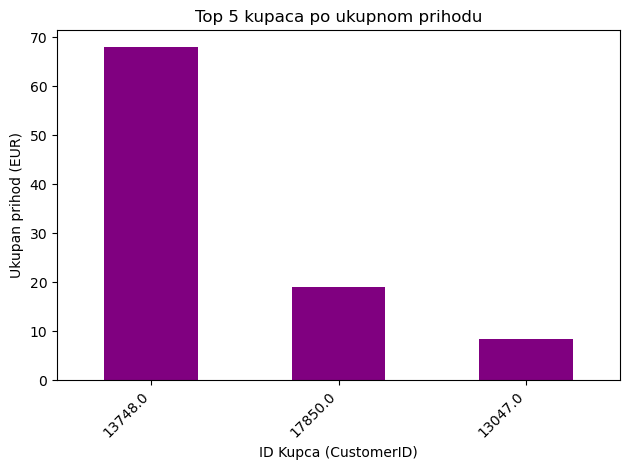

In [35]:
# --- Pitanje 1: Tko su naši najbolji kupci? ---
print("\n\n--- ODGOVOR NA PITANJE 1: Tko su naši najbolji kupci? ---")

# Grupiramo po CustomerID, zbrajamo prihode, sortiramo i uzimamo top 5
top_5_customers = data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(5)

print("\n--- Tablica: Top 5 kupaca po ukupnom prihodu ---")
print(top_5_customers)

# Vizualizacija
top_5_customers.plot(kind='bar', color='purple')
plt.title('Top 5 kupaca po ukupnom prihodu')
plt.xlabel('ID Kupca (CustomerID)')
plt.ylabel('Ukupan prihod (EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



--- ODGOVOR NA PITANJE 2: Koja je prosječna vrijednost narudžbe po državi? ---

--- Tablica: Prosječna vrijednost narudžbe po državi ---
Country
United Kingdom    20.5
Germany           13.8
France             6.3
Name: Revenue, dtype: float64


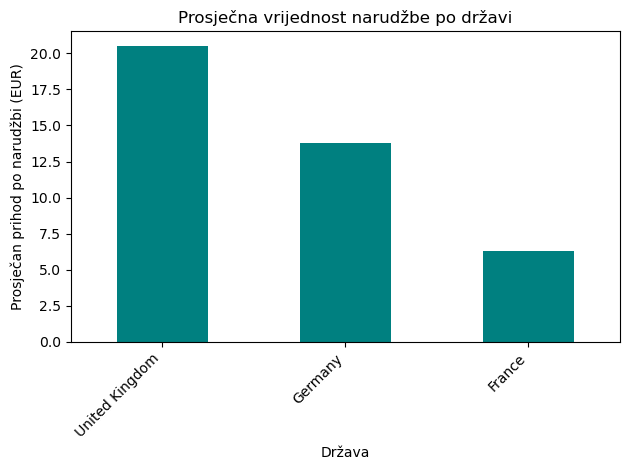

In [37]:
# --- Pitanje 2: Koja je prosječna vrijednost narudžbe po državi? ---
print("\n\n--- ODGOVOR NA PITANJE 2: Koja je prosječna vrijednost narudžbe po državi? ---")

# Korak 1: Izračunaj ukupan prihod za svaku pojedinu narudžbu
revenue_per_order = data.groupby(['Country', 'OrderID'])['Revenue'].sum()

# Korak 2: Izračunaj prosjek tih prihoda po narudžbama za svaku državu
avg_order_value_by_country = revenue_per_order.groupby('Country').mean().sort_values(ascending=False)

print("\n--- Tablica: Prosječna vrijednost narudžbe po državi ---")
print(avg_order_value_by_country)

# Vizualizacija
avg_order_value_by_country.plot(kind='bar', color='teal')
plt.title('Prosječna vrijednost narudžbe po državi')
plt.xlabel('Država')
plt.ylabel('Prosječan prihod po narudžbi (EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



--- ODGOVOR NA PITANJE 3: Kakva je distribucija cijena proizvoda? ---


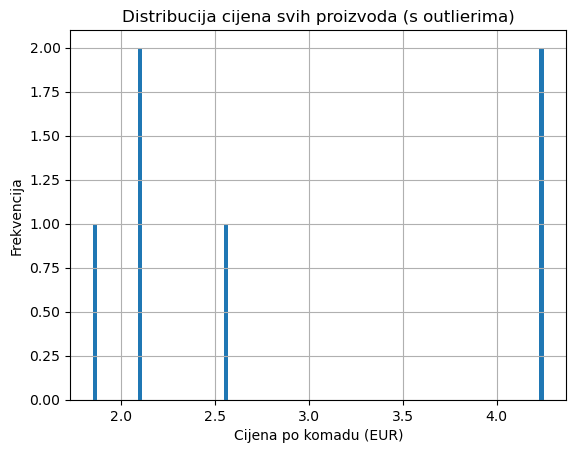


ZAPAŽANJE: Prvi grafikon je nečitljiv jer nekoliko izuzetno skupih proizvoda 'razvlači' X-os, skrivajući detalje za većinu proizvoda.


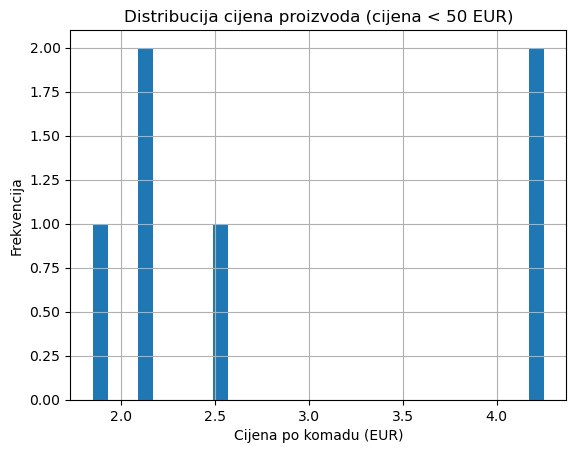


ZAKLJUČAK: Filtrirani histogram jasno pokazuje da se ogromna većina proizvoda u ovoj trgovini prodaje po cijenama nižim od 10 EUR, s najvećom koncentracijom u rasponu od 0 do 5 EUR.


In [39]:
# --- Pitanje 3: Kakva je distribucija cijena proizvoda (UnitPrice)? ---
print("\n\n--- ODGOVOR NA PITANJE 3: Kakva je distribucija cijena proizvoda? ---")

# Prvi pokušaj: Histogram na cijelom datasetu
data['UnitPrice'].hist(bins=100)
plt.title('Distribucija cijena svih proizvoda (s outlierima)')
plt.xlabel('Cijena po komadu (EUR)')
plt.ylabel('Frekvencija')
plt.show()

# Markdown opis problema
print("\nZAPAŽANJE: Prvi grafikon je nečitljiv jer nekoliko izuzetno skupih proizvoda 'razvlači' X-os, skrivajući detalje za većinu proizvoda.")

# Rješenje: Filtriranje i ponovna vizualizacija
price_threshold = 50
data_filtrirano = data[data['UnitPrice'] < price_threshold]

data_filtrirano['UnitPrice'].hist(bins=30)
plt.title(f'Distribucija cijena proizvoda (cijena < {price_threshold} EUR)')
plt.xlabel('Cijena po komadu (EUR)')
plt.ylabel('Frekvencija')
plt.show()

# Markdown zaključak
print("\nZAKLJUČAK: Filtrirani histogram jasno pokazuje da se ogromna većina proizvoda u ovoj trgovini prodaje po cijenama nižim od 10 EUR, s najvećom koncentracijom u rasponu od 0 do 5 EUR.")

# =============================================================================
# Vježba 03: Priprema Podataka za Modeliranje uz Scikit-learn
# Faza: Data Preparation (Napredne tehnike)
# =============================================================================

# =============================================================================
# KORAK 2: UVOD U SCIKIT-LEARN I PRIPREMA ZA TRANSFORMACIJE
# =============================================================================
# Objašnjenje: "Danas uvodimo ključnu biblioteku: Scikit-learn. Ona nudi moćne
# alate, tzv. 'transformere', za pripremu podataka na način koji modeli
# strojnog učenja zahtijevaju."

# Uvozimo alate koje ćemo trebati

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Objašnjenje: "Naš cilj je pripremiti podatke za budući model koji bi, na primjer,
# mogao predviđati prihod. Da bismo to mogli, moramo sve ulazne podatke
# pretvoriti u brojeve i staviti ih na istu skalu."

# Definiramo koje stupce tretiramo kao numeričke, a koje kao kategorijske
numeric_features = ['Quantity', 'UnitPrice']
categorical_features = ['Country', 'Category'] # Dodali smo i Category za bogatiji primjer

print(f"Numeričke značajke za skaliranje: {numeric_features}")
print(f"Kategorijske značajke za enkodiranje: {categorical_features}")
print("\n--- Početne vrijednosti za odabrane stupce ---")
# Koristimo .reset_index() jer su indeksi 'razbacani' nakon čišćenja
print(data[numeric_features + categorical_features].reset_index(drop=True).head())

Numeričke značajke za skaliranje: ['Quantity', 'UnitPrice']
Kategorijske značajke za enkodiranje: ['Country', 'Category']

--- Početne vrijednosti za odabrane stupce ---
   Quantity  UnitPrice         Country   Category
0         6       2.55  United Kingdom  Household
1         2       1.85  United Kingdom    Kitchen
2         3       2.10          France       Toys
3         1       2.10         Germany      Decor
4         6       4.25         Germany    Apparel


# =============================================================================
# KORAK 3: PRIMJENA TRANSFORMACIJA KORISTEĆI ColumnTransformer
# =============================================================================
# Objašnjenje: "Scikit-learn nudi 'ColumnTransformer' koji nam omogućuje da
# primijenimo različite transformacije na različite stupce u jednom koraku."

# Definiramo 'preprocessor' - naš plan transformacije
# 1. 'num' transformacija: Uzmi StandardScaler i primijeni ga na numeric_features.
# 2. 'cat' transformacija: Uzmi OneHotEncoder i primijeni ga na categorical_features.

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop' # Odbacujemo sve ostale stupce koji nisu navedeni
)

# Objašnjenje: "Sada ćemo primijeniti ovaj 'recept' na naš dataset.
# Proces se sastoji od dva koraka: .fit() i .transform().
# .fit() - 'uči' iz podataka (npr. računa prosjek za skaliranje).
# .transform() - primjenjuje naučenu transformaciju."

# Primjena transformacije
# fit_transform radi oba koraka odjednom

In [49]:
data_prepared = preprocessor.fit_transform(data)

# Objašnjenje: "Rezultat nije lijepi DataFrame, već NumPy polje. To je zato
# što su modeli optimizirani za rad s ovim formatom."

In [52]:
print("\n--- Oblik podataka nakon transformacije (redovi, stupci) ---")
print(data_prepared.shape)


--- Oblik podataka nakon transformacije (redovi, stupci) ---
(6, 10)


# =============================================================================
# KORAK 4: INTERPRETACIJA REZULTATA
# =============================================================================
# Objašnjenje: "Što se dogodilo? Dobili smo 8 stupaca.
# Prva dva su naše skalirane numeričke vrijednosti ('Quantity', 'UnitPrice').
# Sljedećih 6 su rezultat One-Hot enkodiranja za 'Country' i 'Category'."

# Da bismo ovo dokazali i lakše interpretirali, vratimo sve u DataFrame

# Dohvaćanje imena novih stupaca nakon One-Hot enkodiranja

In [66]:
print("--- KORAK 4: Interpretacija rezultata ---")

# Dohvaćanje imena novih stupaca
new_categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_new_features = list(numeric_features) + list(new_categorical_features)

# Kreiranje novog, potpuno pripremljenog DataFrame-a
# ISPRAVAK: Uklonjen .toarray() jer data_prepared već jest NumPy polje
data_prepared_df = pd.DataFrame(data_prepared, columns=all_new_features)

print("Transformirani podaci vraćeni u DataFrame (za lakšu interpretaciju):")
print(data_prepared_df.head())
print("\n")

--- KORAK 4: Interpretacija rezultata ---
Transformirani podaci vraćeni u DataFrame (za lakšu interpretaciju):
   Quantity  UnitPrice  Country_France  Country_Germany  \
0  0.439057  -0.296681             0.0              0.0   
1 -0.878114  -0.988936             0.0              0.0   
2 -0.548821  -0.741702             1.0              0.0   
3 -1.207407  -0.741702             0.0              1.0   
4  0.439057   1.384511             0.0              1.0   

   Country_United Kingdom  Category_Apparel  Category_Decor  \
0                     1.0               0.0             0.0   
1                     1.0               0.0             0.0   
2                     0.0               0.0             0.0   
3                     0.0               0.0             1.0   
4                     0.0               1.0             0.0   

   Category_Household  Category_Kitchen  Category_Toys  
0                 1.0               0.0            0.0  
1                 0.0               1.0  